#Validação cruzada e tunning de hiperparametro
---
**Aula Prática 19**: Validação cruzada e tunning de hiperparâmetro


**Objetivo**: Identificar o melhor conjunto de hiperparâmetros com validação cruzada.


Banco de dados:


**Breast cancer wisconsin dataset**


Disponível via sklearn


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
>
> 1) ID number
>
> 2) Diagnosis (0 = malignant, 1 = benign)
>
> 3-32)
>
> Ten real-valued features are computed for each cell nucleus:
>
> a) radius (mean of distances from center to points on the perimeter)
>
> b) texture (standard deviation of gray-scale values)
>
> c) perimeter
>
> d) area
>
> e) smoothness (local variation in radius lengths)
>
> f) compactness (perimeter^2 / area - 1.0)
>
> g) concavity (severity of concave portions of the contour)
>
> h) concave points (number of concave portions of the contour)
>
> i) symmetry
>
> j) fractal dimension ("coastline approximation" - 1)

##Import das principais funções e leitura dos dados


---



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe().T


### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split




``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
No exemplo acima X é um dataframe contendo as features do modelo e Y um dataframe com a variável target.




O parâmetro test_size controla o percentual de dados que será utilizado para teste.




O parâmetro random_state controla a aleatoriedade da geração do dado, permitindo que ao executar o código seja gerado os mesmos bancos de treino e teste.




É importante separar o banco entre treino e teste, pois utilizaremos o banco de treino para treinar modelos e o banco de teste para avaliar os modelos.


### Validação cruzada
Para realizar a validação cruzada separamos o banco de treino em pequenos grupos chamados folds, cada um será utilizado como um banco de treino para avaliarmos a consistência do modelo.


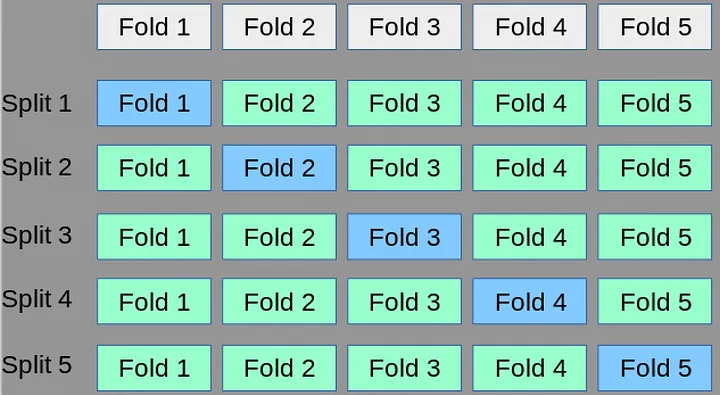


``` python
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X_train, Y_train, scoring=scoring)
```


### Tuning de hiperparâmetro
Para achar o hiperparâmetro que dê o melhor resultado devemos testar diferentes combinações de hiperparâmetro para achar o melhor. Há três algoritmos para fazer:


* GridSearch: Busca por todos os possíveis valores passados pelo usuário.
* RandomSerch: Busca aleatória em um intervalo de valores determinado
* BayesianOptimization: Busca através de um otimizador.


No código a seguir iremos utilizar o GridSearch com validação cruzada


``` python
parameters = {'parâmetro 1' : [0.1, 0.03, 0.01],
              'parâmetro 2': [100, 500, 50]}


clf = GridSearchCV(model, parameters)
clf.fit(X_train, Y_train)
clf.best_params_
pd.DataFrame(clf.cv_results_)
```


### Exercício:




* Separe o banco entre treino e teste. Use 30% do banco para teste. Faça a quebra com todas as variáveis.
* Utilizando um classificador xgboost faça:
* Faça a validação cruzada do modelo, qual o valor médio de precisão macro
* Faça uma busca nos parâmetros learning_rate com valores de 0.1, 0. e 0.01 e n_estimators com valores de 100, 500, 50. Qual é a melhor configuração?

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

#### Solução